## Part 1: Analysis

**The Challenge: Read in the csv containing NBA free throws. Visualise some aspect of the data you find interesting, e.g., the average number of free throws per period for the regular season and the playoffs.**

**My Approach**

Generally when approaching a piece of analysis or data science I follow the following steps:

1. Understand the Task
2. Understand the Domain
3. Understand the Data
4. Research / Plan
5. Collect / Explore the data.
6. Create additional variables / feature engineering (if an ML task)
7. Solve the challenge!

I'll be applying this framework to this particular task. I don't generally do much 'formal' data viz in Python as a lot of my data viz work is done in Javascript, however this is a good opportunity to explore some data viz libraries (particularly **plotly** that I've not used for a while) 

#### 1. Understand the Task

To make this 100% clear I know absolutely nothing about basketball. I played it at school and being a mediocre goalkeeper, I wasn't too bad at it, however shooting and free throws were never my strong suit! That said I do have an interest in analysis in sports, having read Michael Lewis's excellent book Moneyball, which describles how Billy Beane, chairman of the Oakland Athletics, favoured a data based approach over traditional subjective measures to run his team.

One aspect of this that has always intrigued me is the concept of **[The Clutch](https://en.wikipedia.org/wiki/Clutch_%28sports%29)**, which is used to describe the phenomenon of athletes performing under pressure, particularly in situations in the final few minutes of a game. There are conflicting views as to whether this actually exists, so this seems like a good opportunity to explore that. So, I'll set myself the following task:

**Is there any evidence in the free throws dataset to suggest that 'The Clutch' exists? Can you present this in a clear, visual and engaging manner?**

#### 2. Understand the Domain

The next step is to understand a little bit more about basketball and free throws, which are the subject of our challenge.

**Basketball / NBA Background**
* [Basketball](https://en.wikipedia.org/wiki/Basketball) is a team sport in which two teams of five players, opposing one another on a rectangular court, compete with the primary objective of shooting a basketball through the defender's hoop while preventing the opposing team from doing the same.
* In [National Basketball Association (NBA)](https://en.wikipedia.org/wiki/National_Basketball_Association) basketball games there are four periods (quarters) each lasting 12 minutes, meaning the entire game lasts 48 minutes.
* In the event of a tie at the end of the game, 5 minute overtime periods are played until the tie is broken.
* In the NBA, there are two conferences (Eastern and Western) and the two conferences are each split into 3 divisions.
* The NBA seasons is split into the regular season where each team plays 82 games, 41 each home and away, and the playoffs where the top eight teams in each conference (regardless of where they finished in their division) compete for the championship.

**Free Throw Background**
* Free throws or foul shots are unopposed attempts to score points by shooting from behind the free throw line (informally known as the foul line or the charity stripe), a line situated at the end of the restricted area. Free throws are generally awarded after a foul on the shooter by the opposing team.
* Each successful free throw is worth one point.
* They are most often awarded when a player is fouled in the process of shooting.
* However they are also awarded as part of the [team bonus](https://en.wikipedia.org/wiki/Bonus_%27basketball%28) situation where upon the the concession of the fifth and subsequent fouls by a team in a given quarter, free throws are awarded to their opponenents for each foul regardless of whether the foul was committed whilst shooting. Team fouls are reset at the beginning of each quarter.
* In overtime periods, team bonuses are awarded for the fourth and subsequent fouls rather than the fifth foul.

#### 3. Understand the Data

Now we know a little more about basketball, we can take a look at the dataset we've been given. I'll do some more more detailed analysis of the data in the data exploration phase, but for now we need to understand what the data is, how it was collected and how reliable it's likely to be.

* The data looks to be an exhaustive colleciton of 618k free throws taken in the US National Basketball Association (NBA) between 2006 and 2016 in .csv format. 
* It looks to have originally been collected via a web scrape of the [ESPN.in](http://www.espn.in/), specifically their play-by-play archive, an example of which can be seen [here](http://www.espn.in/nba/playbyplay?gameId=261031013).
* It is been [hosted on Kaggle](https://www.kaggle.com/sebastianmantey/nba-free-throws) so there's likely been work done on it before by both basketball and data science fans!

A quick check of the html source for a [Play-by-play page](http://www.espn.in/nba/playbyplay?gameId=261031013) reveals that the scraper has picked up `<td>game details,/td>` elements in situations where the text contains `free throw`. Having had a look through [ESPN.in](http://www.espn.in/) and cross referenced the data itself, I think the data looks fairly reliable, however since we have not collected and validated this data ourselves, we should be mindful that it may not be exhaustive and caveat our results accordingly.

#### 4. Research and Plan

This looks to be a pretty simple task (famous last words!). My rough plan is:

1. Import the data check through it & explore.
2. Do some research into Plotly - an ex-colleague of mine was very good with it so I need to take some time to go through his work.
3. Drop / create / change any variables I need to.
4. Analyse the data and see if I can find any evidence that the 'Clutch' exists.
5. Visualise my findings.

**Getting Started**

First of all, I'm going to import my packages. **Pandas** and **Numpy** are both standard for any kind of data analysis work as are **matplotlib** and **seaborn** for data viz work. However I'm also importing **plotly** to make some interactive charts. This is only my second time using at and it seems like a great opportunity to use it again! Two of my favourite other packages for data exploration are **pandas_profiling** which builds a really nice profile report for datasets and **missingno** which visualises missing data in a dataset.

In [6]:
# Import Packages & Modules
from datetime import datetime, time, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from pandas_profiling import ProfileReport
import plotly
import plotly.offline as py
import plotly.graph_objs as go

In [7]:
# Options
py.init_notebook_mode(connected=True)
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

#### 5. Explore the Data

In [10]:
# Specify the path to the data
infile = './data/input/free_throws.csv'
# Read the data in
df = pd.read_csv(infile)
df.head()

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18


**Variable Summary**

* **end_result:** This is the end result of the game with the home team's score coming first.
* **game:** The game being played. Note that the teams names are abbreviated as a three-letter string.
* **game_id:** The unique identifier of the game. This is created by ESPN.in
* **period:** The period in which the play takes place. In most cases this will be 1-4 but if overtime is being played, it can be as many as 8.
* **play:** The play being made. In this dataset, the play always relates to a free throw.
* **player:** The player taking the free throw.
* **playoffs:** Whether the game is part of the regular season or the playoffs
* **score:** The score of the game **after** the free throw has been taken.
* **season:** The season in which the game is taking place.
* **shot_made:** Integer to represent whether a free throw was successful.
* **time:** The time remaining in the period at the point the free throw was taken.

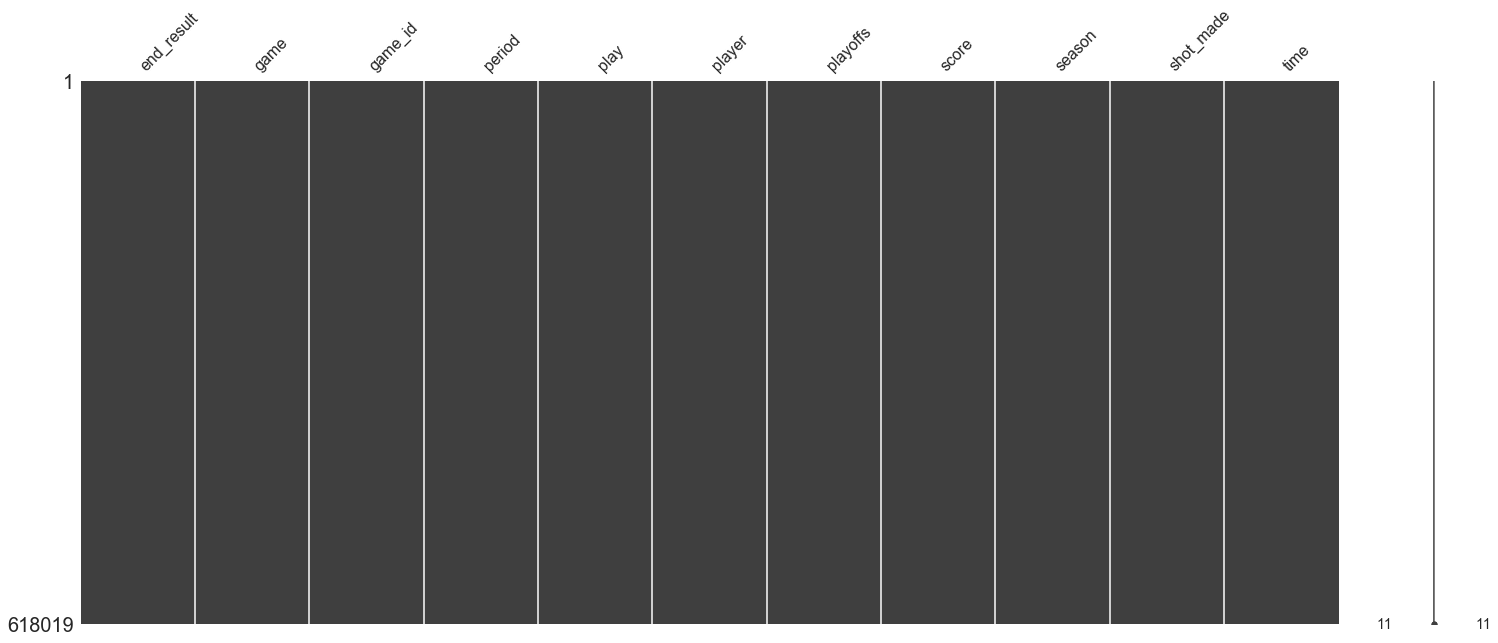

In [11]:
# Check for missing values
msno.matrix(df)

I'm a pretty big fan of the `ProfileReport` library however it doesn't display too well on NBViewer. It does look a lot better in an actual Jupyter Notebook!

In [12]:
# Get a report on the data
ProfileReport(df)

Number of variables,11
Number of observations,618019
Total Missing (%),0.0%
Total size in memory,51.9 MiB
Average record size in memory,88.0 B
Numeric,2
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,0


**Data Exploration Summary**  

A summary of the data exploration:

* There are nearly 1000 games worth of free throw data. This is quite a large dataset and should be representative for some analysis on 'the clutch'.
* The data looks to be of good quality and formatting.
* There are no missing values in the dataset. This is incredibly rare!
* One banana skin is the `time` variable - This is the time remaining in the period rather than the time elapsed. This will likely require some additional work.
* Additionally the `time` variable is also a string so some work will be needed to convert it into a format fit for analysis. I generally shy away from using DateTime variables in Python so I'll create variables for seconds and minutes elapsed for our analysis work.
* Annoyingly there is no variable to indicate which team a player is on. This could be inferred in some cases by seeing which scores increase if a second free throw is successful but as there are years worth of data, and players can move teams in that time, it's likely that this would be complex and introduce errors.
* There is no indicator to indicate if a game is in overtime. This will need to be created based upon the period.

#### 6. Additional Variable Creation

As a result of my exploratory work, I'm going to create some new variables as follows:

* A time formatted time variable
* An overtime variable
* Categorical variables to aid in data visualisation
* A selection of time variables based upon the time string, including time remaining / elapsed in minutes and seconds.
* Home and Away team variables (these may come in handy at some point)

In [13]:
# Creating a variable to indicate the number of the free throw
df['throw_number'] = df['play'].str[-6]

In [14]:
# Creating variables to identify the home & away teams
df['home_team'] = df['game'].str[:3]
df['away_team'] = df['game'].str[6:9]

In [15]:
# Creating periods elapsed / remaining variables (as integers)
periods_remaining = {
    1: 3,
    2: 2,
    3: 1,
    4: 0,
    5: 0,
    6: 0,
    7: 0,
    8: 0
}

df['periods_elapsed'] = df['period'].astype(int)
df['periods_remaining'] = df['period'].replace(periods_remaining).astype(int)

In [16]:
# Creating an in_overtime variable
in_overtime = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 1,
    6: 1,
    7: 1,
    8: 1
}

df['in_overtime'] = df['period'].replace(in_overtime).astype(int)

In [17]:
# Creating an overtime periods played variable (this is to help calculate game time elapsed)

overtime_periods_played = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
    5: 0,
    6: 1,
    7: 2,
    8: 3
}

df['overtime_periods_played'] = df['period'].replace(overtime_periods_played).astype(int)

In [18]:
# Creating a numeric variable to indicate a shot has been taken
df['shot_taken'] = 1

In [19]:
# Renaming the shot_made variable to keen the convention consistent
df.rename(columns={'shot_made': 'shot_scored'}, inplace=True)

In [20]:
# Creating a shot_missed variable
shot_missed = {
    0: 1,
    1: 0
}

df['shot_missed'] = df['shot_scored'].replace(shot_missed)

In [21]:
# Creating a scored / missed categorical variable
scored_missed = {
    0: 'Missed',
    1: 'Scored'
}

df['scored_missed'] = df['shot_scored'].replace(scored_missed)

In [22]:
# Creating a period time remaining variable (in time format)

def period_time_remaining(row):
    '''
    DataFrame function to convert the time string into pandas datetime 
    format
    '''
    time_list = row['time'].split(':')
    return timedelta(hours=0, minutes=int(time_list[0]), seconds=int(time_list[1]))

df['period_time_remaining'] = df.apply(period_time_remaining, axis=1)

In [23]:
# Creating a period time elapsed variable

def period_time_elapsed(row):
    '''
    DataFrame function to calculate the time elapsed in the specific period accounting
    for overtime
    '''   
    period_length = time()
    
    if row['in_overtime'] == 0:
        period_length = timedelta(hours = 0,minutes = 12, seconds = 0)
        
    elif row['in_overtime'] == 1:
        period_length = timedelta(hours = 0,minutes = 5, seconds = 0)
        
    period_time_elapsed = period_length - row['period_time_remaining']
    
    return period_time_elapsed

df['period_time_elapsed'] = df.apply(period_time_elapsed, axis=1)

In [24]:
# Creating a game time remaining variable

def game_time_remaining(row):
    '''
    DataFrame function to calculate the time remaining in the game accounting
    for overtime
    '''
    
    # Calculate the amount of time left in the periods left to play
    periods_mins_remaining = 0
    
    if row['in_overtime'] == 0:
        periods_mins_remaining = row['periods_remaining'] * 12

    game_time_remaining = (
        timedelta(hours = 0, minutes = periods_mins_remaining, seconds = 0)
        +
        row['period_time_remaining']
    )
    
    return game_time_remaining

df['game_time_remaining'] = df.apply(game_time_remaining, axis=1)

In [25]:
# Creating a game time elapsed variable

def game_time_elapsed(row):
    '''
    DataFrame function to calculate the time elapsed in the game accounting
    for overtime
    '''
    
    game_time_elapsed = None
    
    if row['in_overtime'] == 0:
        game_time_elapsed = (
            timedelta(hours = 0, minutes = 48, seconds = 0)
            - 
            row['game_time_remaining']
        )
    
    elif row['in_overtime'] == 1:
        
        overtime_elapsed = row['overtime_periods_played'] * 5
        
        game_time_elapsed = (
            timedelta(minutes = 48) # Regular time
            +
            timedelta(minutes = overtime_elapsed) # Completed overtime periods
            +
            row['period_time_elapsed']
        )

    return game_time_elapsed


df['game_time_elapsed'] = df.apply(game_time_elapsed, axis=1)

In [26]:
# Re-order the dataframe + drop unwanted variables

df.drop(['overtime_periods_played','time','periods_elapsed','periods_remaining',], axis=1, inplace=True)

df = df[[
    'season',
    'game_id',    
    'game',
    'playoffs',
    'home_team',
    'away_team',    
    'period',
    'play',
    'player',
    'throw_number',   
    'shot_taken',
    'shot_scored',
    'shot_missed', 
    'scored_missed',
    'score',
    'end_result',
    'in_overtime',
    'period_time_elapsed',
    'period_time_remaining',
    'game_time_elapsed',
    'game_time_remaining'
]]

In [27]:
df.head()

,season,game_id,game,playoffs,home_team,away_team,period,play,player,throw_number,shot_taken,shot_scored,shot_missed,scored_missed,score,end_result,in_overtime,period_time_elapsed,period_time_remaining,game_time_elapsed,game_time_remaining
0,2006 - 2007,261031013.0,PHX - LAL,regular,PHX,LAL,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,1,1,1,0,Scored,0 - 1,106 - 114,0,00:00:15,00:11:45,00:00:15,00:47:45
1,2006 - 2007,261031013.0,PHX - LAL,regular,PHX,LAL,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,2,1,1,0,Scored,0 - 2,106 - 114,0,00:00:15,00:11:45,00:00:15,00:47:45
2,2006 - 2007,261031013.0,PHX - LAL,regular,PHX,LAL,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,1,1,1,0,Scored,18 - 12,106 - 114,0,00:04:34,00:07:26,00:04:34,00:43:26
3,2006 - 2007,261031013.0,PHX - LAL,regular,PHX,LAL,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,2,1,0,1,Missed,18 - 12,106 - 114,0,00:04:34,00:07:26,00:04:34,00:43:26
4,2006 - 2007,261031013.0,PHX - LAL,regular,PHX,LAL,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,1,1,1,0,Scored,21 - 12,106 - 114,0,00:04:42,00:07:18,00:04:42,00:43:18


Now I've created the additional variables, we'll give these a sense check by exporting to a csv:

In [33]:
df.to_csv('./data/output/free_throws_1.csv')

Looks good - I used a combinations of filters and the 'Mark I Eyeball' to look for patterns, irregularities and inconsitencies and didn't find a great deal of note other than the fact that Lebron James is probably very good at Basketball.

**7. Solve the Challenge**

So... We've created our base dataset and now we're in a position to do some deeper data exploration & visualisation looking at shots made and missed.  To start with we'll create a table using pandas `groupby`:

In [58]:
# game_time (gt) dataframe to support a visualisation
df_gt = (
    df[['game_time_elapsed', 'shot_taken', 'shot_scored', 'shot_missed']]
    .groupby(['game_time_elapsed'])
    .sum()
    .reset_index()
)

It's good practice to check that this has worked OK, and nothing stupid has happened.

In [60]:
df_gt.head()

,game_time_elapsed,shot_taken,shot_scored,shot_missed
0,00:00:04,18,14,4
1,00:00:07,8,7,1
2,00:00:08,10,7,3
3,00:00:09,8,6,2
4,00:00:11,28,21,7


Having created a table, we can now create an interactive visualisation using plotly. Plotly creates some nice interactive charts with a rangeslider, perfect for datasets like this one as you can zoom in and out of various sections of the data. But first, in order to better visualise the data, we should convert the timedelta to seconds.

In [61]:
# Convert the timedelta to seconds
def timedelta_to_seconds(row):
    '''
    DataFrame function that converts a timedelta to seconds.
    '''
    return int(row['game_time_elapsed'].total_seconds())

df_gt['game_time_elapsed_seconds'] = df_gt.apply(timedelta_to_seconds, axis=1)

We can then create our chart.

In [62]:
# Creating a plotly interactive chart

shot_taken = go.Scatter(
    x = df_gt['game_time_elapsed_seconds'],
    y = df_gt['shot_taken'],
    mode = 'lines',
    name = 'Shots Taken',
    line = dict(width = 1)
)

shot_scored = go.Scatter(
    x = df_gt['game_time_elapsed_seconds'],
    y = df_gt['shot_scored'],
    mode = 'lines',
    name = 'Shots Scored',
    line = dict(width = 1)
)

shot_missed = go.Scatter(
    x = df_gt['game_time_elapsed_seconds'],
    y = df_gt['shot_missed'],
    mode = 'lines',
    name = 'Shots Missed',
    line = dict(width = 1)
)

layout = dict(
    xaxis=dict(
        showgrid=False,
        rangeslider=dict(visible=True),
        dtick=60,
        title='Game Time Elapsed (seconds)'),
    yaxis=dict(title='Number of Free Throws'),
    title='NBA Free Throws Taken/Scored/Missed 2006 - 2016 by Game Time Elapsed')


plot_data = [shot_taken, shot_scored, shot_missed]
fig = dict(data=plot_data, layout=layout)
py.iplot(fig)

This plot is interactive, and you can hover over the datapoints for specific values or use the rangeslider below the chart to zoom in on specific sections.

**Analysis**  

This is interesting! The key points are as follows:
* You can clearly see the four 12 minute quarters in the data
* Each quarter follows a pattern - free throws generally gradually increase throughout the quarter, although the data does become more sparse in the second half of each quarter.
* There is a trough then a large spike at the end of each quarter
* There isn't a great deal of data for overtime situations.

There could be several explanations for these patterns as follows:

* The gradual increase could be related to the [team bonus](https://en.wikipedia.org/wiki/Bonus_%27basketball%28) situation, where free throws are awarded following the concession of the fifth and subsequent fouls. 
* The sparsitry of the data in the second half of the quarter could be due to timeouts being called. These are generally used to break up the rhythmn and slows the tempo of the game.
* The trough and peak at the end of each quarter is likely tactical. Since possession is turned over following scoring, teams are more likely to retain possession until the final seconds of the quarter before attempting to score, since this will give their opponents little time to respond before the quarter ends.
* Overtime is played very rarely!
 

I would caveat these theories by saying that my knowledge of NBA level Basketball is based almost entirely from wikipedia! Had I had more time I would have validated my theories them with someone with deeper Basketball knowledge.

If we wanted to improve this visualisation, we could:
* Fit a line to the data to remove a lot of the peaks and troughs and make the trend clearer
* Alternatively, bin the time periods into 5/10 second intervals
* Format the x axis and the tick labels to more clearly show the quarters.

It's also important to point out that the visualisation isn't without limitations. It shows the patterns of shots taken, scored and missed well, but it's difficult to see a trend relating to the % of shots that were scored. 

This would be far more appropriate to our aim of visualising 'the clutch' and I'd hope to see a pattern of a greater % of shots missed at the end of each quarter and also in overtime. 

Since we've already created the variables in our `df_gt` dataframe, and we can use the same plotly visualisation, we can create this really quickly.

In [38]:
df_gt['shot_scored_%'] = (df_gt['shot_scored'] / df_gt['shot_taken'] * 100).round(2)
df_gt.head()

,game_time_elapsed,shot_taken,shot_scored,shot_missed,game_time_elapsed_seconds,shot_scored_%
0,00:00:04,18,14,4,4,77.78
1,00:00:07,8,7,1,7,87.50
2,00:00:08,10,7,3,8,70.00
3,00:00:09,8,6,2,9,75.00
4,00:00:11,28,21,7,11,75.00


In [39]:
shot_taken = go.Scatter(
    x = df_gt['game_time_elapsed_seconds'],
    y = df_gt['shot_scored_%'],
    mode = 'lines',
    name = 'Shots Taken',
    line = dict(width = 1)
)

layout = dict(
    xaxis=dict(
        showgrid=False,
        rangeslider=dict(visible=True),
        dtick=60,
        title='Game Time Elapsed'),
    yaxis=dict(title='% of Shots Scored'),
    title='NBA Free Throws % of Shots Scored 2006 - 2016 by Game Time Elapsed')


plot_data = [shot_taken]
fig = dict(data=plot_data, layout=layout)
py.iplot(fig)

**Analysis**

From the looks of things, there appears to be a very slight downward trend in the % of shots scored over the course of the game, however as with the previous visualisation, this is difficult to identify, particularly in overtime.

The downward trend would bear out my hypothesis that the clutch exists as pressure is generally accepted to mount later in the game, and particularly in overtime.

If my theory were true I would expect to see an tangible decrease in the number of shots made in overtime when pressure is likely to be at it's highest.

However, what we can do, is perform linear regression on the data to create a line of best fit that will hopefully make this clearer. For this we can use the **Seaborn** library as follows:

/Users/tomewing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



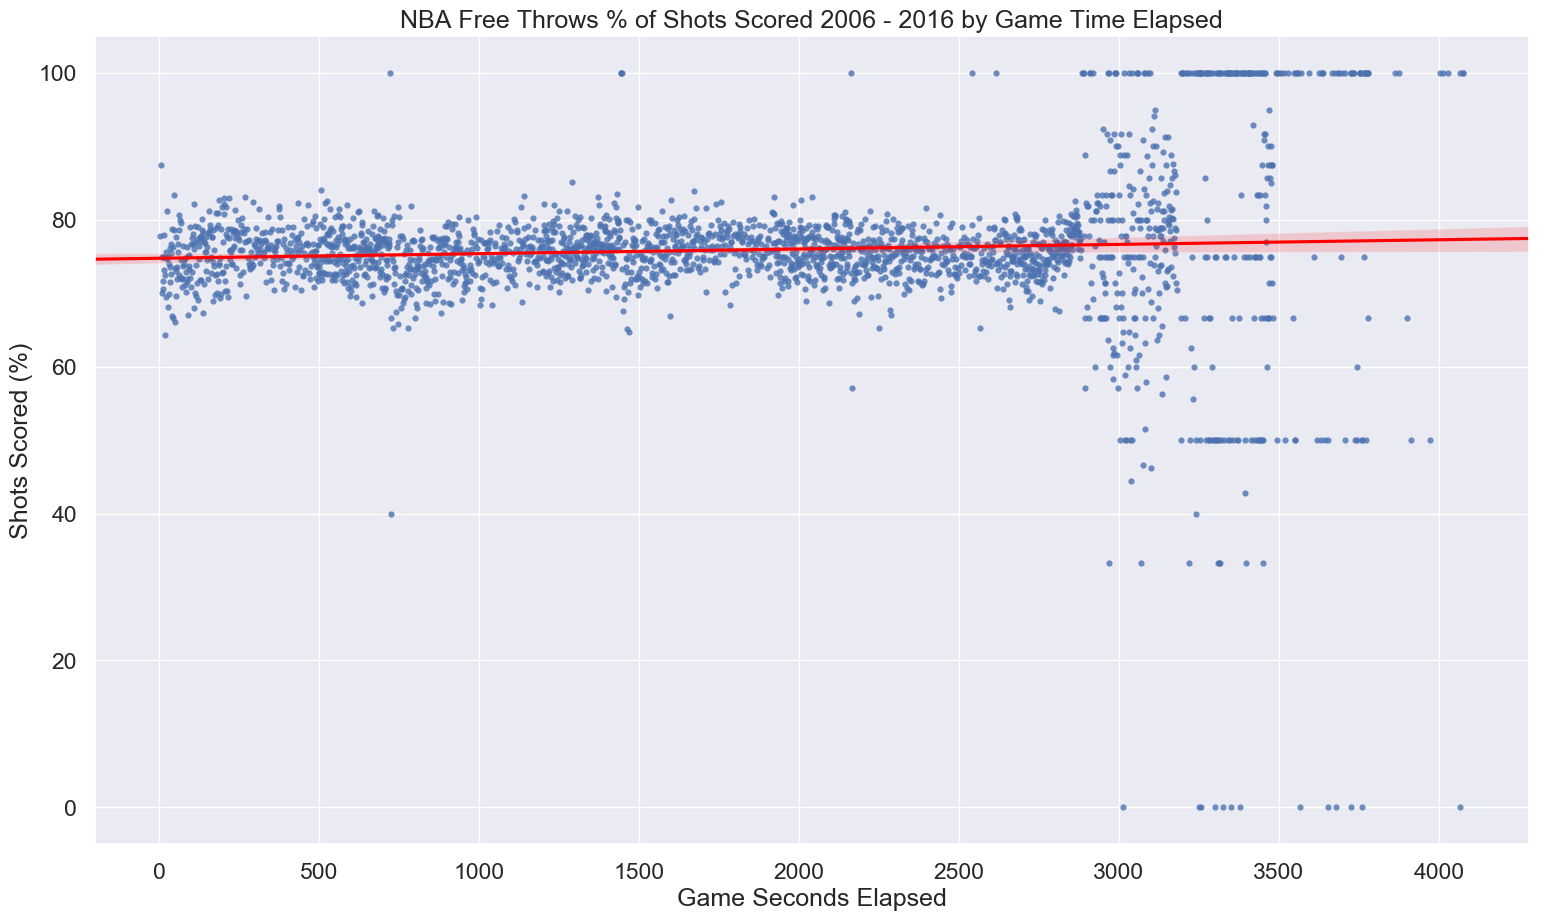

In [57]:
sns.set(font_scale=1.5)
ax = sns.regplot(
    label='label',
    x=df_gt['game_time_elapsed_seconds'],
    y=df_gt['shot_scored_%'],
    scatter_kws={'s': 20},
    line_kws={'color': 'red'}
).set_title('NBA Free Throws % of Shots Scored 2006 - 2016 by Game Time Elapsed')
plt.xlabel("Game Seconds Elapsed")
plt.ylabel("Shots Scored (%)")
ax.figure.set_size_inches(18.5, 10.5)

This is again interesting... Contrary to my earlier assumption, the regression line is almost flat and if anything has a slight upward trend, indicating that the longer the game goes on, the more successful free throw attempts are, although this could also be caused by the sparsity of the data for free throws in overtime as indicated by the larger margin of error shown on the chart.

**Conclusion**



In light of our initial challenge, **Is there any evidence in the free throws dataset to suggest that 'The Clutch' exists?** from the analysis above, it's actually impossible to say, and to be fair I probably bit off more than I can chew unless I planned to write a novel on the subject.

It's tempting for us to say that Free Throws may become slightly more successful over time, but this is an aggregate view and doesn't tell the whole story. My analysis may be affected by the sparsity of overtime data compared to regular time data. To know for sure we would need to create a clutch_shot variable (possibly using the last seconds of a period, playoff games and overtime periods) and analyse specific player patterns to determine the impact of pressure on individuals. As it stands some players may get better in clutch situations and some worse, but these patterns may not be visible in an aggregate view.

It's also important to remember that NBA players represent the pinnacle of Basketball talent. It's not unreasonable to assume that the best players in the world probably thrive under pressure situations anyway. The pattern may be different for less well regarded leagues or people who play for fun, but data for these is likely to be much harder to come by.